<!--Header-->
<div>
    <div class="row" style="color: #4D4D4D;font-size: 15px;padding-bottom: 20px">
        <div class="col-md-7">
            <img src="http://materials.cv.uoc.edu/cdocent/common/img/logo-uoc.png" alt="Logo UOC" class="img-responsive" style="margin:20px 0px 0px">
        </div>
        <div class="col-md-5">
            <h1 style="margin:15px 0px 0px;font-size: 40px;">Eines de visualització de dades</h1>
            <div style="text-align:left;margin-top: 5px;"></div>
        </div>
    </div>
    <div class="row" style="background: #FCB517;padding: 10px 20px;">
        <div class="col-md-6">
            <div>PID_00233252</div>
        </div>
        <div class="col-md-6">
            <div style="text-align:right;">Autor: Xavier Duran Albareda <span style="margin-left: 30px;">Coordinació: Julià Minguillón</span></div>
        </div>
    </div>
</div>
<!--/Header-->

## Introducció

La visualització de dades és una part imprescindible en la mineria de dades. El primer que fem quan ens enfrontem a un nou conjunt de dades és l'anàlisi exploratori que ens permet conèixer millor les nostres dades. En aquesta fase, ser capaços de crear visualitzacions ajuda notablement a entendre l'estructura i veure més clares les relacions entre les variables, sobretot quan ens enfrontem a _datasets_ grans o amb una alta dimensionalitat.

Podem veure l'anàlisi visual de les dades inclòs en un procés continu de _feedback_ entre la visualització i la construcció de models estadístics, com ens proposa Keim (diagrama). Un model estadístic més adequat ens permet  crear millors visualitzacions que alhora, ens donaran pistes per construir models més complexos i detallats.

![](images/keim.png)

En aquesta activitat presentarem algunes de les llibreries més utilitzades en `Python` per generar visualitzacions i mostrarem exemples de com fer els gràfics més habituals.

## Llibreries de visualització de dades

### Matplotlib

[`Matplotlib`](https://matplotlib.org/) és la llibreria de visualització de dades més popular, i permet crear visualitzacions bastant fàcilment.

![Matplotlib](images/matplotlib.png)

### Seaborn

[`Seaborn`](https://seaborn.pydata.org/) és una llibreria basada en `Matplotlib` que està enfocada en la visualització de models estadítics. `Seaborn` no pretén substituir `Matplotlib`, sinó complementar-la per tal de poder fer visualitzacions més complexes amb una programació a alt nivell i amb menys esforç.

![Seaborn](images/seaborn.png)

### Bokeh

[`Bokeh`](https://bokeh.pydata.org/en/latest/) és una altra llibreria de visualització de dades enfocada a les visualitzacions interactives. A diferència de `Seaborn`, `Bokeh` és independent de `Matplotlib`. El principal focus de `Bokeh` és la interacció a la web a l'estil dels documents centrats en dades [D3.js Data-Driven Documents](https://d3js.org/).

![Bokeh](images/bokeh.png)

## _House prices dataset_

El conjunt de dades que farem servir en aquesta activitat correspon al _dataset_ [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) que és una de les competicions d'iniciació de [Kaggle](www.kaggle.com).

In [33]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

df_train = pd.read_csv('data/train.csv')

## Visualitzacions més comuns

A continuació veurem algunes de les visualitzacions més comuns i com implementar-les en alguna de les tres llibreries que hem presentat abans.

### Diagrama de barres

El diagrama de barres és una de les visualitzacions més comuns. Ens mostra la relació entre una variable numèrica i una altra de categòrica. Per exemple, podem mostrar la relació entre el nombre de banys d'una vivenda i el preu de venda mitjà.

En aquest exemple, primer calcularem la mitjana de preu de venda per nombre de banys i després farem servir la funció `plot` de `Matplotlib` per visualitzar-la.

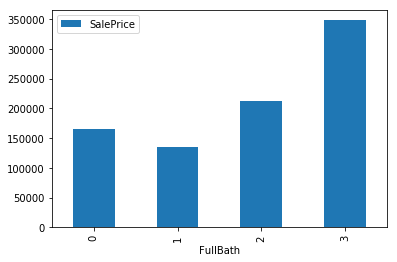

In [34]:
pivot = df_train.pivot_table(index='FullBath', values='SalePrice', aggfunc=np.mean)
pivot.plot(kind='bar')

### Histograma i diagrama de densitat

#### Histograma

Un histograma ens permet representar gràficament la distribució d'una variable numèrica. La variable es divideix en diferents particions o _bins_ que representen un rang de valors de la variable. Per cada partició es representa el nombre d'observacions amb aquell rang de valors. La forma de l'histograma pot canviar considerablement depenent del nombre de particions que definim.

A continuació mostrarem la distribució de la variable `SalePrice` amb diferent nombre de particions. Farem servir la funció `distplot` de la llibreria `Seaborn`.

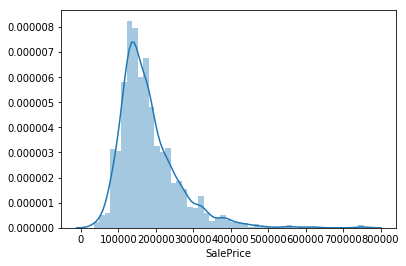

In [35]:
sns.distplot(df_train["SalePrice"])

Canviem el nombre de particions a 100:

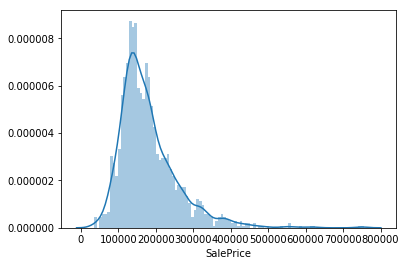

In [36]:
sns.distplot(df_train["SalePrice"], bins=100)

I ara a només 10:

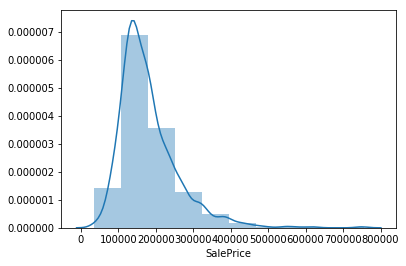

In [37]:
sns.distplot(df_train["SalePrice"], bins=10)

#### Diagrama de densitat

El diagrama de densitat també mostra la distribució d'una variable numèrica, i és molt semblant a l'histograma. El diagrama de densitat és una corba que suavitza la discontinuitat de les particions de l'histograma i té un paràmetre _bandwidth_ (`bw`) per controlar com s'adapta a les dades.

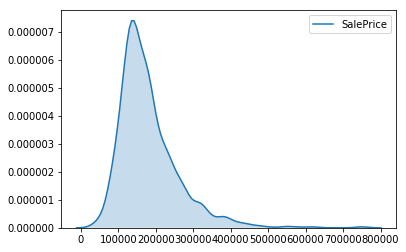

In [38]:
sns.kdeplot(df_train["SalePrice"], shade=True)

El valor per defecte intenta fer una bona adaptació però pot ser útil provar altres valors.

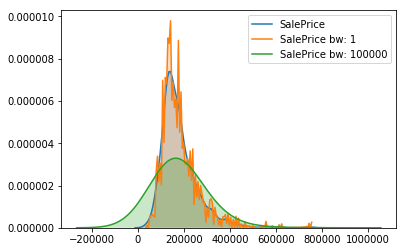

In [39]:
sns.kdeplot(df_train["SalePrice"], shade=True)
sns.kdeplot(df_train["SalePrice"], shade=True, bw=1, label="SalePrice bw: 1")
sns.kdeplot(df_train["SalePrice"], shade=True, bw=100000, label="SalePrice bw: 100000")
plt.legend();

### Diagrama de caixes i de violí

El diagrama de caixes ens dóna un sumari gràfic d'una o vàries variables. La línia que divideix la caixa en dos meitats representa el valor de la mediana de les dades. Els extrems de la caixa mostren els quartils inferiors i superiors i les línies extremes els valors màxims i mínims excloent els _outliers_. El diagrama de caixes però, amaga part de la informació, com la distribució dels valors de la variable o el nombre d'observacions.

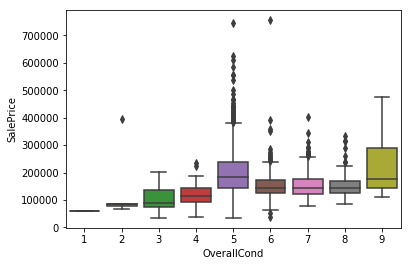

In [40]:
sns.boxplot(x=df_train["OverallCond"], y=df_train["SalePrice"])

Podem afegir-hi el detall de les observacions o _jitter_ amb la funció `swarmplot` de `Seaborn`.

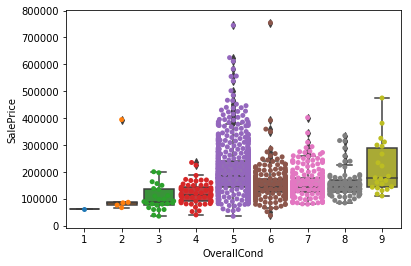

In [41]:
sns.swarmplot(x=df_train["OverallCond"], y=df_train["SalePrice"])
sns.boxplot(x=df_train["OverallCond"], y=df_train["SalePrice"])

En el nostre cas tenim un nombre gran d'observacions i probablement és millor fer servir el diagrama de violí per veure la distribució de les variables.

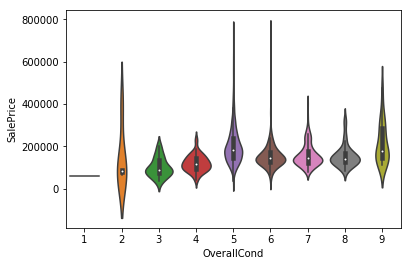

In [42]:
sns.violinplot(x=df_train["OverallCond"], y=df_train["SalePrice"])

### Diagrama de dispersió

El diagrama de dispersió mostra la relació de dues variables en dues dimensions. Cada punt representa una observació, i la posició als eixos horitzontal i vertical representa el valor de les dues variables per aquella observació. És un diagrama molt útil per estudiar la relació entre dues variables.

Mostrem la relació entre el preu de venda i els metres quadrats d'una vivenda. Com és d'esperar, veiem una clara correlació entre les dues variables.

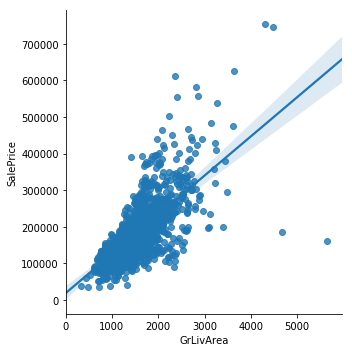

In [43]:
sns.lmplot(x="GrLivArea", y="SalePrice", data=df_train, fit_reg=True, legend=False)

Podem afegir-hi una tercera dimensió utilitzant colors per codificar una altra variable. En aquest cas, afegirem la variable categòrica `OverallQual` que correspon a la qualificació de l'habitatge i la mostrarem amb un codi de colors.

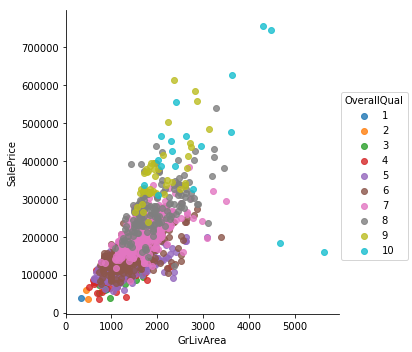

In [44]:
sns.lmplot(x="GrLivArea", y="SalePrice", data=df_train, fit_reg=False, hue="OverallQual", legend=True)

La llibreria `Seaborn` ens permet fer visualitzacions més complexes, i afegir-hi un histograma per cada eix. Alhora, ens calcula el coeficient de correlació de Pearson i el p-valor de la mesura de correlació.

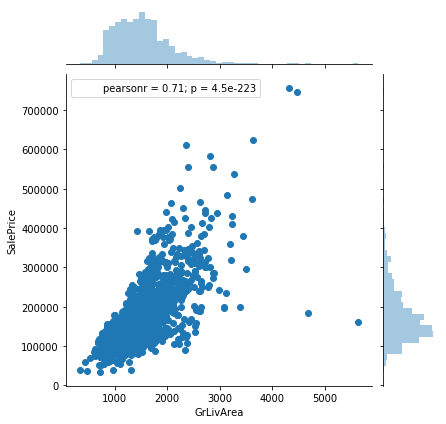

In [45]:
sns.jointplot(x="GrLivArea", y="SalePrice", data=df_train, kind='scatter')

Si el fet de tenir moltes observacions ens amaga la densitat d'aquestes, podem fer servir un `hexbin plot`, que ens divideix la quadrícula en hexàgons i ens codifica amb un color més intens on tenim més densitat d'observacions.

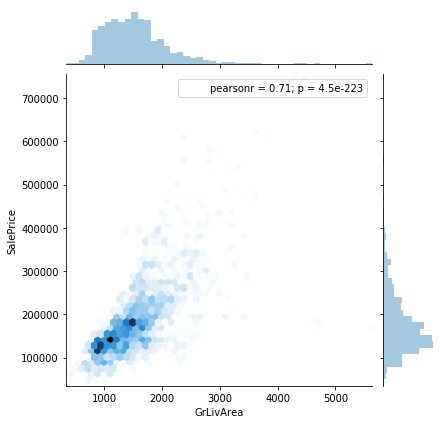

In [46]:
sns.jointplot(x="GrLivArea", y="SalePrice", data=df_train, kind='hex')

### Mapa de calor

El mapa de calor és una representació gràfica de les dades on els valors d'una matriu són representats amb colors. És útil per representar visualment una matriu numèrica de dades.

En el següent exemple, calcularem la correlació entre diverses variables del conjunt de dades i la mostrarem visualment amb un mapa de calor.

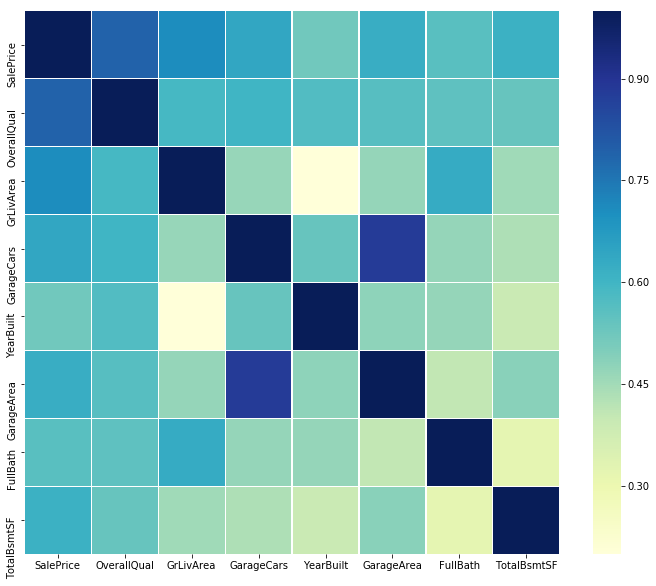

In [47]:
corrmat = df_train.corr(method='spearman')
k = 8 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(cm, ax=ax, cmap="YlGnBu", linewidths=0.1, yticklabels=cols.values, xticklabels=cols.values)

## Conclusió

En aquesta activitat hem vist algunes de les visualitzacions més comunes i exemples de com implementar-les en les llibreries `Matplotlib` i `Seaborn`. La clau per una bona visualització de les dades és tenir clar quina visualització triar i perquè, depenent de la naturalesa de les dades, i després saber triar l'eina per fer-la possible.

## Bibliografia

Keim, D. A., Mansmann, F., Schneidewind, J., Thomas, J., & Ziegler, H. (2008). Visual analytics: Scope and challenges. In Visual data mining (pp. 76-90). Springer, Berlin, Heidelberg.

Minguillón, J. (2017). Anàlisi visual de dades: conceptes bàsics i eines. Item: revista de biblioteconomia i documentació, 2(63).

<!--Footer-->
 <div style="background: #333333;padding: 35px 0px;margin-top: 25px;">
    <div class="row">
     <div class="col-sm-12">
        <img src="http://materials.cv.uoc.edu/cdocent/common/img/logo-uoc-bottom.png" alt="Logo UOC" class="img-responsive" style="margin: 0 auto; display: block;">
    </div>
</div>
</div>
<!--/Footer-->